## This code is to find out the different of each epoch and batch size combination

In [25]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [26]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/alexnet/fashion_mnist/'
data_path2 = parent_path / 'Data/alexnet/cifar100/'
# data_path1 = parent_path / 'Data/alexnet_AllLayers/fashion_mnist/'
# data_path2 = parent_path / 'Data/alexnet_AllLayers/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet/cifar100


### extract data

In [27]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [28]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R1', 'E50_B64_R1', 'E30_B256_R1', 'E30_B128_R2', 'E20_B128_R2', 'E20_B64_R2', 'E50_B64_R0', 'E20_B256_R0', 'E30_B256_R0', 'E10_B128_R0', 'E40_B64_R0', 'E30_B64_R2', 'E50_B512_R1', 'E40_B512_R1', 'E10_B128_R1', 'E10_B256_R2', 'E30_B2048_R0', 'E50_B512_R0', 'E40_B512_R0', 'E40_B64_R1', 'E10_B64_R2', 'E20_B512_R1', 'E30_B512_R1', 'E10_B1024_R0', 'E20_B512_R0', 'E30_B512_R0', 'E40_B128_R2', 'E50_B128_R2', 'E50_B256_R1', 'E40_B256_R1', 'E20_B2048_R0', 'E10_B512_R2', 'E50_B256_R0', 'E40_B256_R0', 'E30_B128_R1', 'E20_B128_R1', 'E20_B256_R2', 'E50_B64_R2', 'E20_B64_R0', 'E30_B256_R2', 'E20_B64_R1', 'E30_B128_R0', 'E20_B128_R0', 'E20_B1024_R0', 'E30_B64_R1', 'E50_B512_R2', 'E40_B512_R2', 'E10_B256_R0', 'E30_B64_R0', 'E40_B64_R2', 'E40_B1024_R0', 'E10_B256_R1', 'E10_B2048_R0', 'E10_B128_R2', 'E20_B512_R2', 'E30_B512_R2', 'E10_B64_R1', 'E12_B256_R0', 'E10_B64_R0', 'E30_B1024_R0', 'E50_B256_R2', 'E40_B256_R2', 'E40_B128_R1', 'E50_B128_R1', 'E10_B512_R0', 'E40_B128_

### analysis data

#### find the data in same epoch and batch size

In [29]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [30]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [31]:
LayersName = ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
# LayersName = ['Conv1', 'ReLU2', 'MaxP3', 'Conv4', 'ReLU5', 'MaxP6', 'Conv7', 'ReLU8', 'Conv9', 'ReLU10', 'Conv11', 'ReLU12', 'MaxP13', 'Adap14', 'Flat15', 'Line16', 'ReLU17', 'Drop18', 'Line19', 'ReLU20', 'Drop21', 'Line22']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 7


##### fashionMNIST

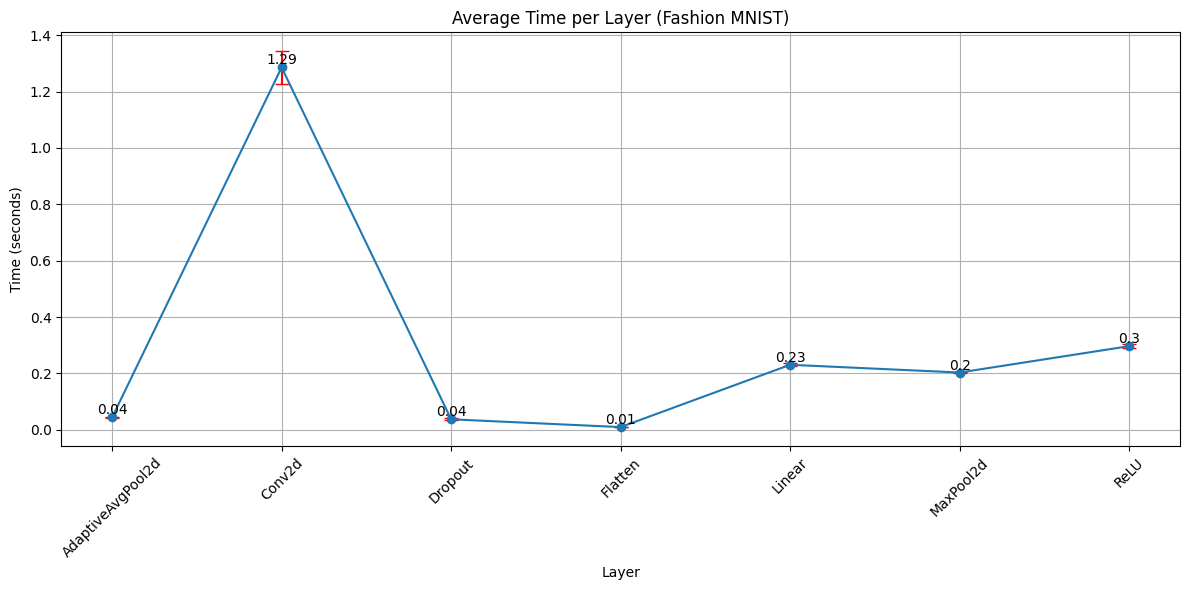

In [32]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer (Fashion MNIST)')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

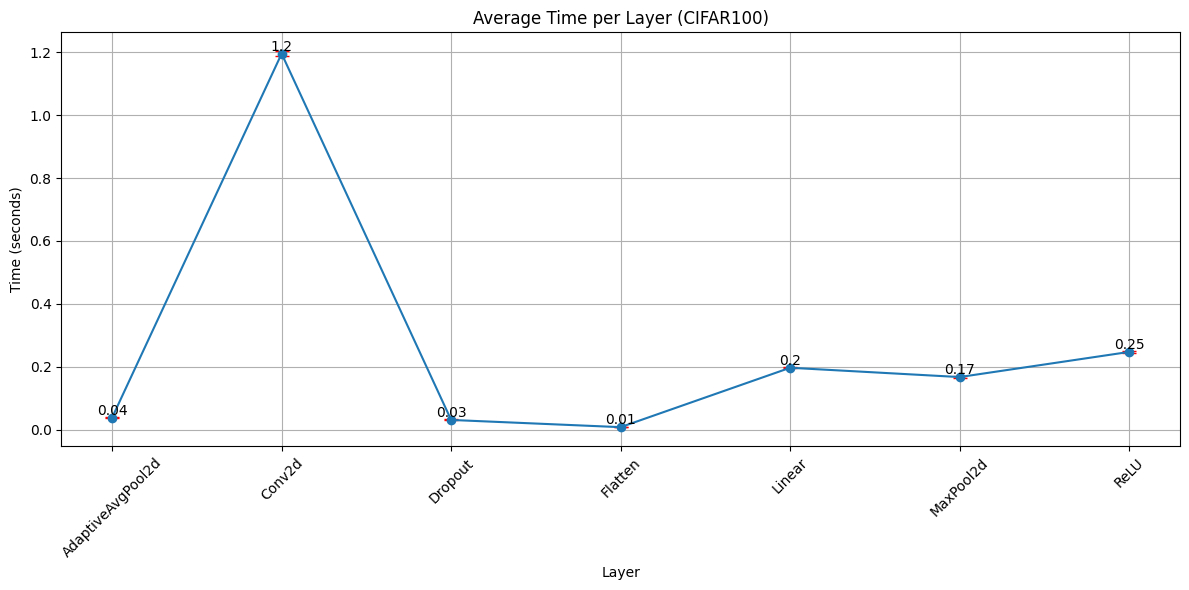

In [33]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer (CIFAR100)')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [34]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

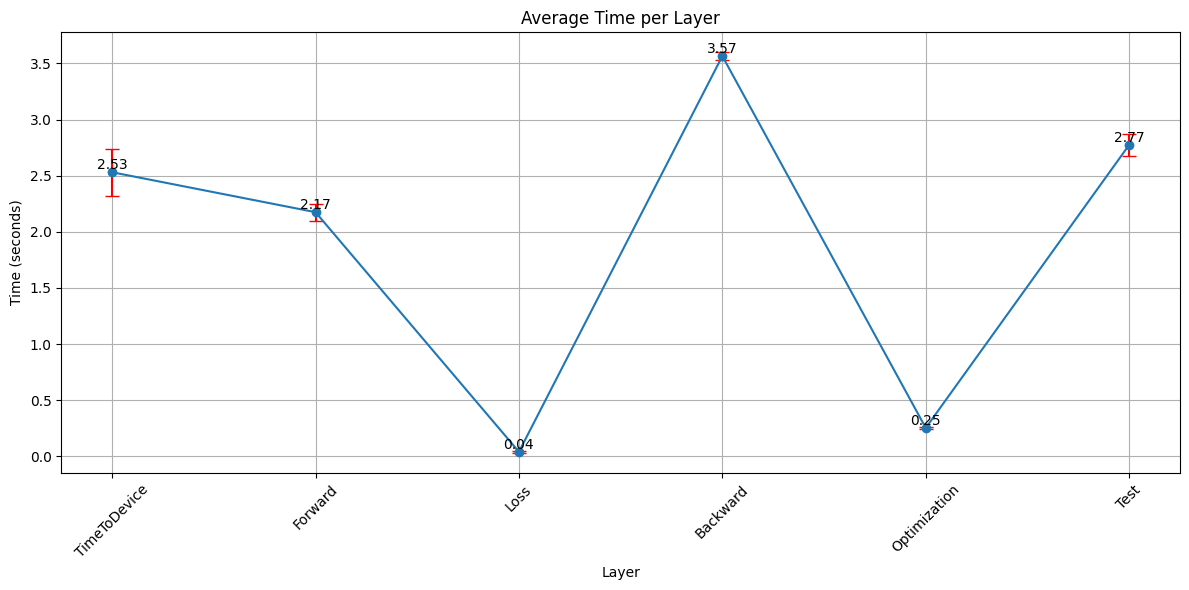

In [35]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

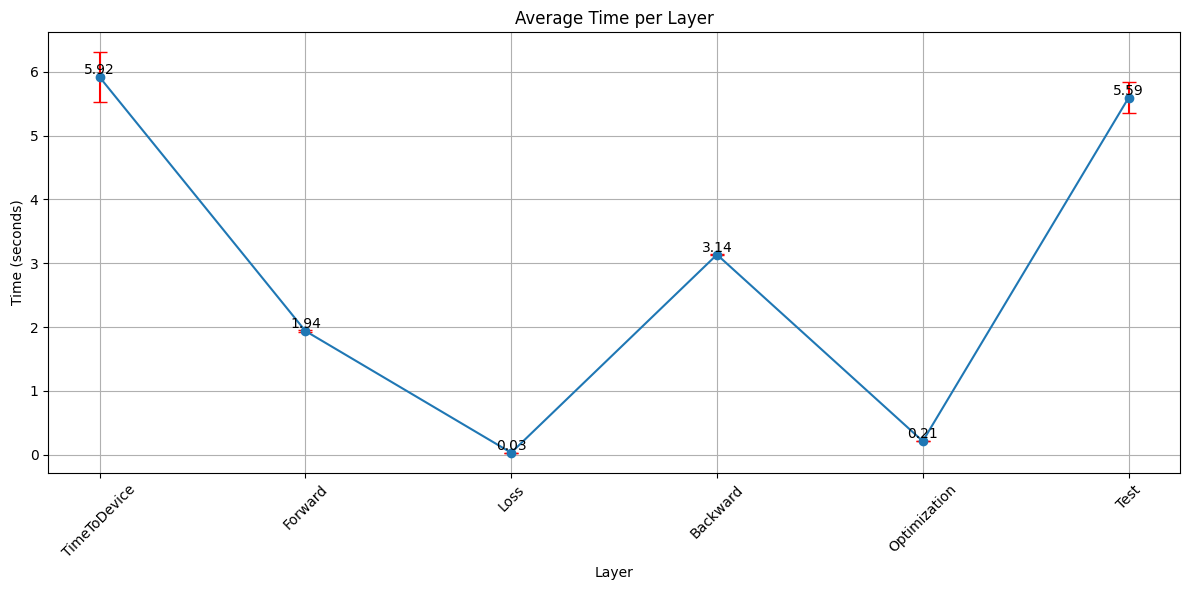

In [36]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [37]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
EpochTime_recorded_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [38]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    EpochTime_recorded_f[0,i] = len(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')
print(f'The recorded time per epoch is: {EpochTime_recorded_f}')

The total energy per epoch is: [[2580.3  2628.59 2678.78 2727.82 2725.43 2828.93 2753.35 2670.71 2769.53
  2728.4  2839.42 2748.13 2703.4  2681.6  2766.   2822.27 2741.69 2768.77
  2710.45 2704.2 ]]
The average energy per epoch is: [[151.78 164.29 167.42 160.46 160.32 157.16 161.96 166.92 162.91 160.49
  157.75 161.65 168.96 167.6  162.71 156.79 161.28 162.87 169.4  169.01]]
The recorded time per epoch is: [[17. 16. 16. 17. 17. 18. 17. 16. 17. 17. 18. 17. 16. 16. 17. 18. 17. 17.
  16. 16.]]


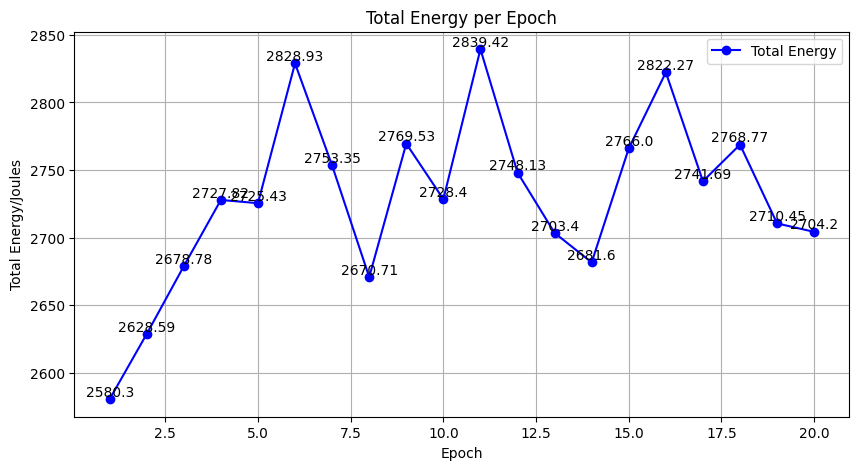

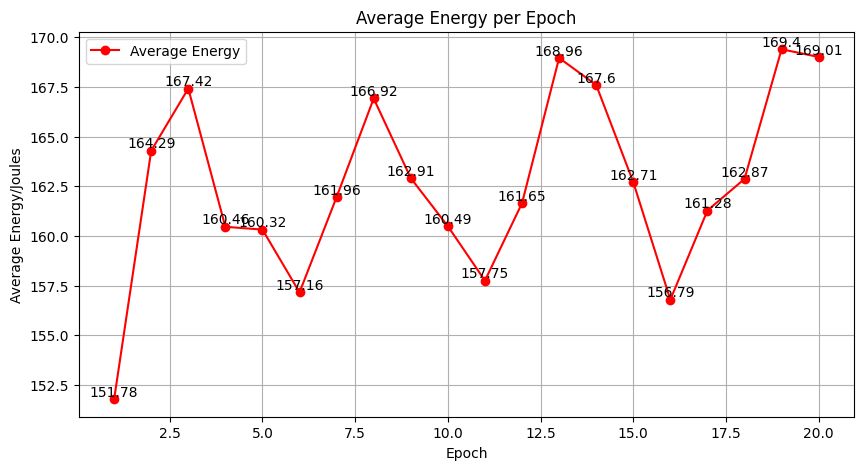

In [39]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [40]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 2728.8885, the standard deviation is: 62.681841571144


In [41]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 162.58650000000003, the standard deviation is: 4.576763348699601


##### cifar100 

In [42]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
EpochTime_recorded_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [43]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    EpochTime_recorded_c[0,i] = len(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')
print(f'The recorded time per epoch is: {EpochTime_recorded_c}')

The total energy per epoch is: [[2877.31 2782.27 2705.97 2844.07 2800.53 2836.81 2796.38 2818.22 2862.41
  2821.45 2802.5  2755.44 2732.25 2843.48 2945.33 2895.15 2759.74 2953.2
  2814.46 2783.31]]
The average energy per epoch is: [[ 95.91 103.05 100.22  98.07 100.02 101.31  96.43  97.18 102.23  97.29
  100.09 102.05 101.19  98.05  95.01  96.51 106.14  95.26 104.24  99.4 ]]
The recorded time per epoch is: [[30. 27. 27. 29. 28. 28. 29. 29. 28. 29. 28. 27. 27. 29. 31. 30. 26. 31.
  27. 28.]]


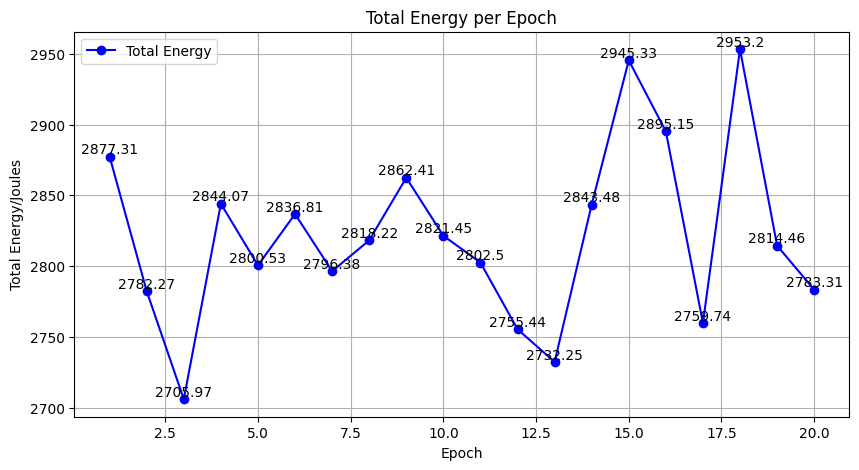

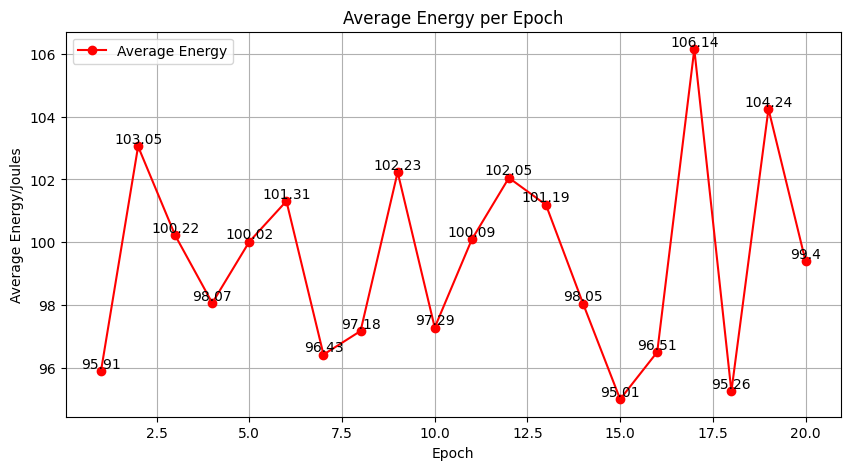

In [44]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

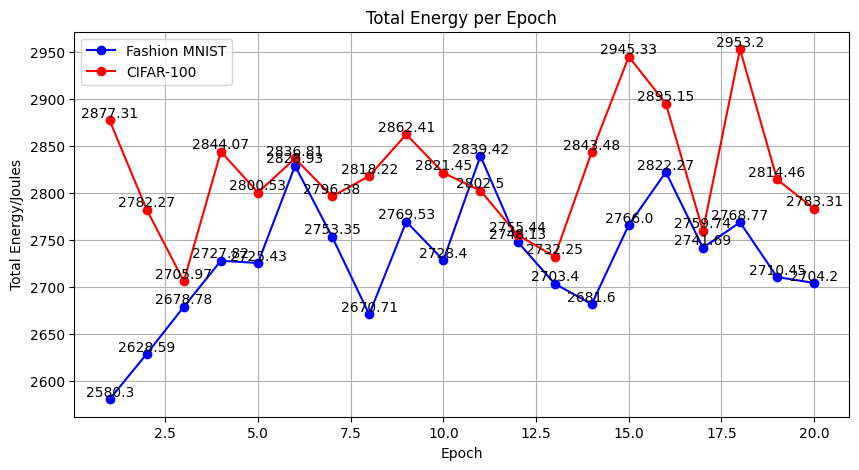

In [45]:
# plot total energy per epoch of two datasets
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Fashion MNIST')
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='CIFAR-100')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], np.round(totalEpochEnergy_f[0,i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

#### EpochTime

##### fashionMNIST

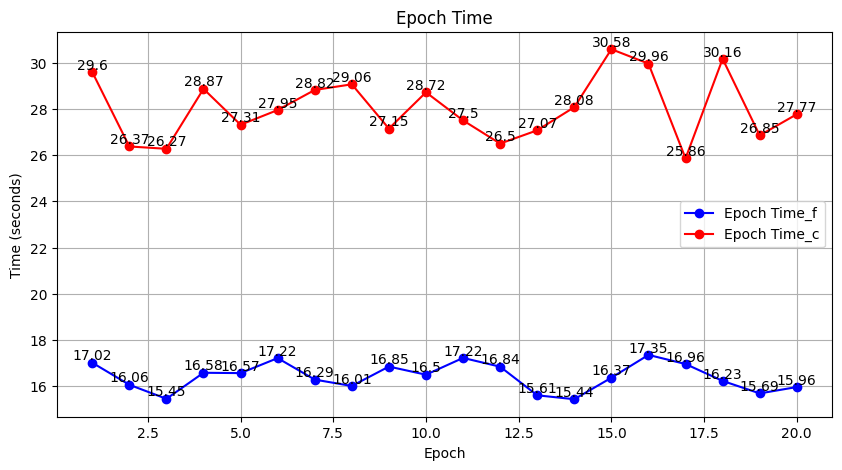

In [46]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [47]:
EpochTime_f

array([17.01678109, 16.06198359, 15.45475459, 16.58171487, 16.56669641,
       17.21582723, 16.2859273 , 16.00985289, 16.84978676, 16.49765038,
       17.22440243, 16.84389305, 15.60637689, 15.43681622, 16.36635852,
       17.35490417, 16.959934  , 16.22907472, 15.68812299, 15.96412945])

##### cifar100

In [48]:
EpochTime_c

array([29.59554338, 26.37422943, 26.27371097, 28.86648822, 27.31413674,
       27.9505105 , 28.81965494, 29.06412125, 27.14756536, 28.71812677,
       27.50177836, 26.4988606 , 27.0737226 , 28.07510853, 30.58274388,
       29.95914531, 25.85929465, 30.16428852, 26.85296059, 27.76900172])

#### average energy consumption per step

##### fashionmnist

In [49]:
# calculate the average energy consumption per step in each epoch, and get the round value
EnergyConsumpStep_f = np.round(TrainPartTime_f * avgEpochEnergy_f, 2)
print(f'The shape of the EnergyConsumpStep_f is {EnergyConsumpStep_f.shape}')

The shape of the EnergyConsumpStep_f is (6, 20)


In [50]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_f = np.mean(EnergyConsumpStep_f, axis=1)
EnergyConsumpStepStd_f = np.std(EnergyConsumpStep_f, axis=1)

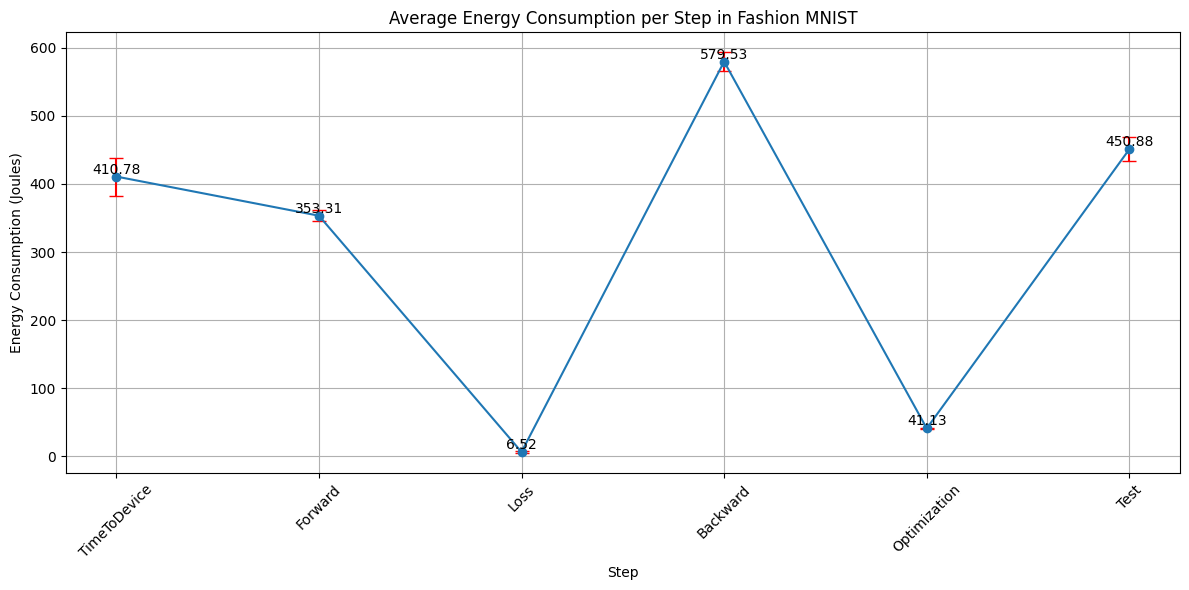

In [51]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_f, yerr=EnergyConsumpStepStd_f, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in Fashion MNIST')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_f[i], np.round(EnergyConsumpStepMean_f[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [52]:
EnergyConsumpStep_c = np.round(TrainPartTime_c * avgEpochEnergy_c, 2)

In [53]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_c = np.mean(EnergyConsumpStep_c, axis=1)
EnergyConsumpStepStd_c = np.std(EnergyConsumpStep_c, axis=1)

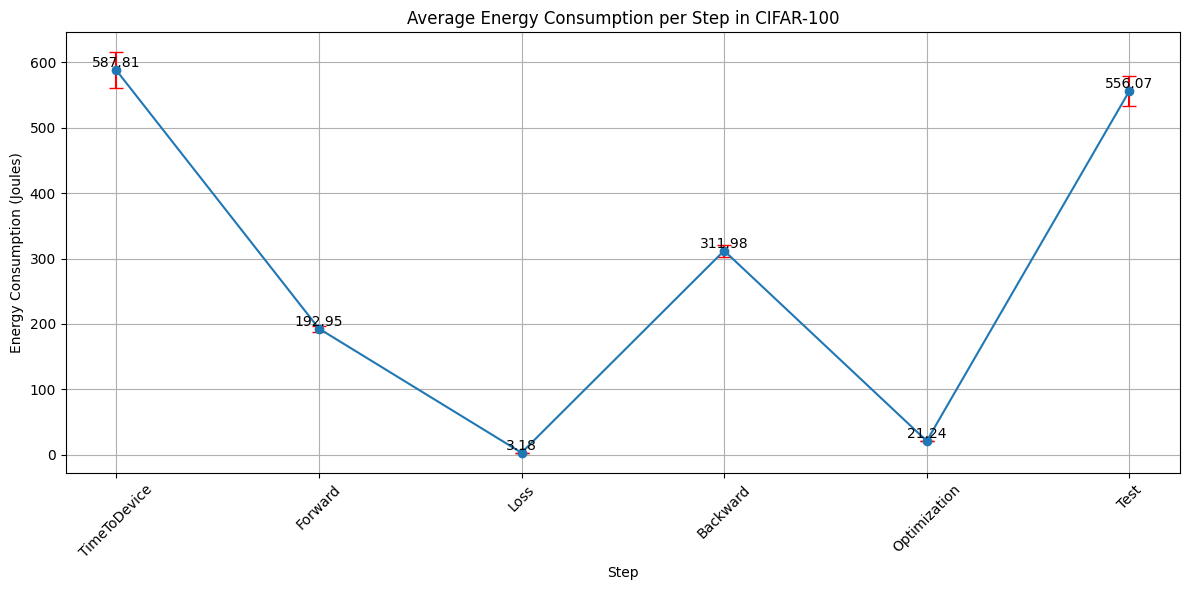

In [54]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_c, yerr=EnergyConsumpStepStd_c, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in CIFAR-100')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_c[i], np.round(EnergyConsumpStepMean_c[i], 2), ha='center', va='bottom')
plt.show()